In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.spatial import distance

def load_data(filepath):
    """
    Charge les données du fichier CSV.
    """
    return pd.read_csv(filepath)

# Utilisation de la fonction
file_path = 'data/1v1.csv'  # Assurez-vous que ce chemin est correct
data = load_data(file_path)


In [3]:
def get_win_rates(data, champion, min_matches=50):
    """
    Calcule le taux de victoire des adversaires contre un champion donné.
    """
    # Filtrer les matchs où le champion choisi est soit champ1 soit champ2
    matches = data[(data['champ1'] == champion) | (data['champ2'] == champion)]
    
    # Calculer les taux de victoire
    win_rates = {}
    for _, row in matches.iterrows():
        if row['champ1'] == champion:
            opponent = row['champ2']
            win = 1 if row['win'] == 0 else 0
        else:
            opponent = row['champ1']
            win = row['win']

        if opponent not in win_rates:
            win_rates[opponent] = {'wins': 0, 'total': 0}
        
        win_rates[opponent]['wins'] += win
        win_rates[opponent]['total'] += 1

    # Filtrer pour garder seulement les champions avec un nombre minimum de matchs
    win_rates = {champ: stats for champ, stats in win_rates.items() if stats['total'] >= min_matches}

    # Calculer le pourcentage de victoire
    for champ in win_rates:
        win_rates[champ]['win_rate'] = win_rates[champ]['wins'] / win_rates[champ]['total']

    return win_rates


In [4]:
def top_counter_champions(data, champion, top_n=5):
    """
    Retourne les champions ayant les meilleurs taux de victoire contre le champion choisi.
    """
    win_rates = get_win_rates(data, champion)
    sorted_champs = sorted(win_rates.items(), key=lambda x: x[1]['win_rate'], reverse=True)
    return sorted_champs[:top_n]

In [5]:
# Demander à l'utilisateur de saisir un champion
champion = input("Entrez le nom d'un champion : ")

In [6]:
# Trouver et afficher les 5 meilleurs champions contre le champion choisi
top_counters = top_counter_champions(data, champion)
print(f"Les 5 meilleurs champions contre {champion} sont :")
for champ, stats in top_counters:
    print(f"{champ} avec un taux de victoire de {stats['win_rate'] * 100:.2f}%")

Les 5 meilleurs champions contre Zed sont :
Kayn avec un taux de victoire de 66.13%
Kled avec un taux de victoire de 61.40%
Nocturne avec un taux de victoire de 60.55%
XinZhao avec un taux de victoire de 60.27%
Ezreal avec un taux de victoire de 59.74%


In [7]:
# Charger les données des champions à partir du fichier CSV
data_champions = pd.read_csv('data/Champions_LoL_Reorganized.csv')

# Ensuite, exécutez le code précédent pour calculer les moyennes
top_counters = ['RekSai', 'Malphite', 'Ivern', 'Camille', 'Nocturne']
top_counters_data = data_champions[data_champions['Nom du Champion'].isin(top_counters)]
mean_ratings = top_counters_data.mean(numeric_only=True)

mean_ratings


Id             67.6
Ad              5.4
Ap              2.2
Early           3.8
MidGame         7.6
Lategame        7.6
Snowball        4.8
Escarmouche     7.6
Teamfight       6.0
CC              7.4
Burst           6.4
Dps             2.6
Range           4.6
Mobilité        4.0
SplitPush       4.8
dtype: float64

In [8]:
print(data_champions.columns)

Index(['Nom du Champion', 'Id', 'Rôle principal', 'Ad', 'Ap', 'Early',
       'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC',
       'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush'],
      dtype='object')


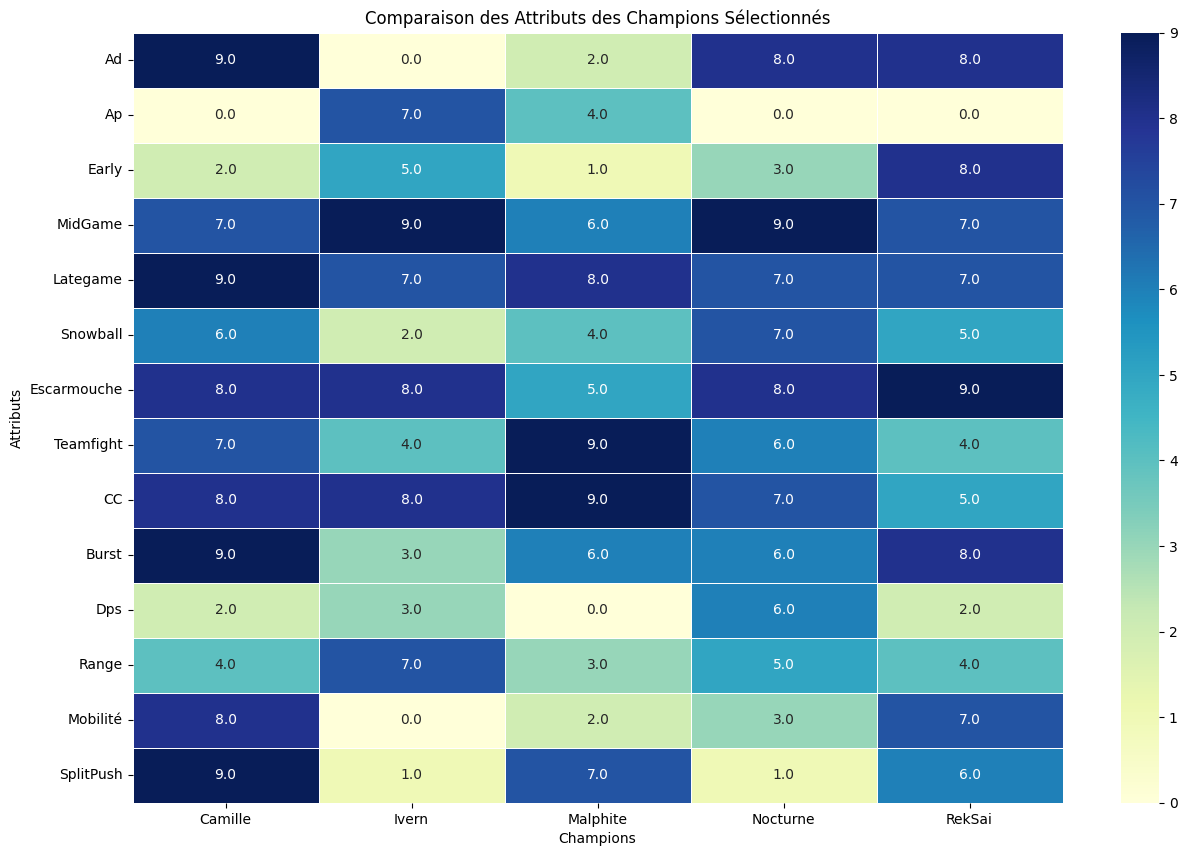

In [9]:
# Charger votre DataFrame
data = pd.read_csv('data/Champions_LoL_Reorganized.csv')

# Filtrer les données pour ne garder que les champions sélectionnés
selected_champions = data[data['Nom du Champion'].isin(top_counters)]

# Liste des attributs à comparer
attributes = ['Ad', 'Ap', 'Early', 'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC', 'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush']

# Sélectionner les attributs pour les champions sélectionnés
selected_attributes = selected_champions.set_index('Nom du Champion')[attributes].T

# Créer un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(selected_attributes, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title('Comparaison des Attributs des Champions Sélectionnés')
plt.ylabel('Attributs')
plt.xlabel('Champions')
plt.show()


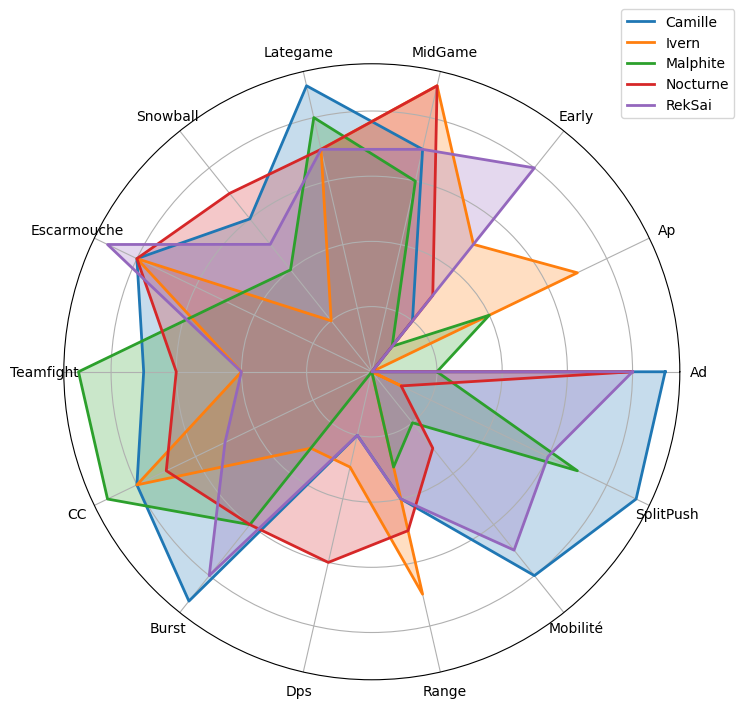

In [10]:
# Filtrer les données pour les champions sélectionnés
selected_champions = data[data['Nom du Champion'].isin(top_counters)]

# Définir les attributs à comparer
attributes = ['Ad', 'Ap', 'Early', 'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC', 'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush']

# Création d'un diagramme radar pour chaque champion
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracer chaque champion sur le même graphique
for i, (idx, row) in enumerate(selected_champions.iterrows()):
    values = row[attributes].tolist()
    values += values[:1]
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, linewidth=2, label=row['Nom du Champion'])

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Ajouter une légende
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


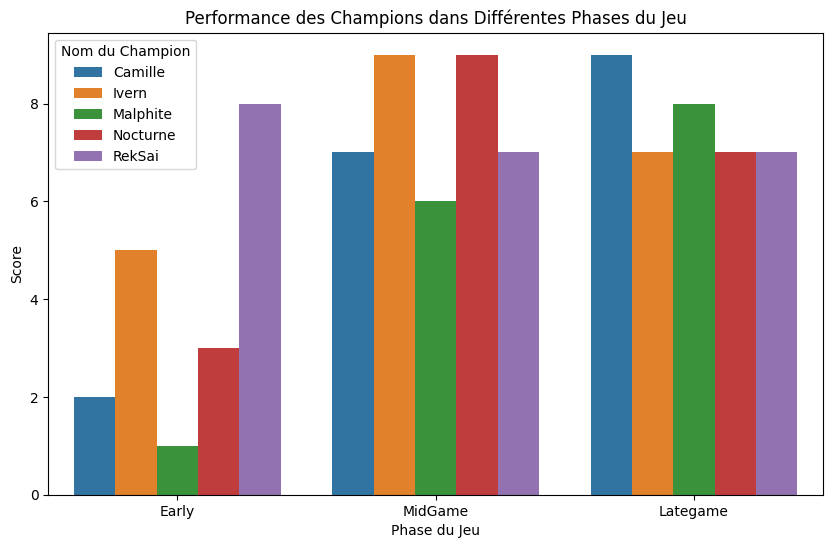

In [11]:
plt.figure(figsize=(10, 6))
phases = ['Early', 'MidGame', 'Lategame']
sns.barplot(data=selected_champions.melt(id_vars='Nom du Champion', value_vars=phases), x='variable', y='value', hue='Nom du Champion')
plt.title('Performance des Champions dans Différentes Phases du Jeu')
plt.xlabel('Phase du Jeu')
plt.ylabel('Score')
plt.show()


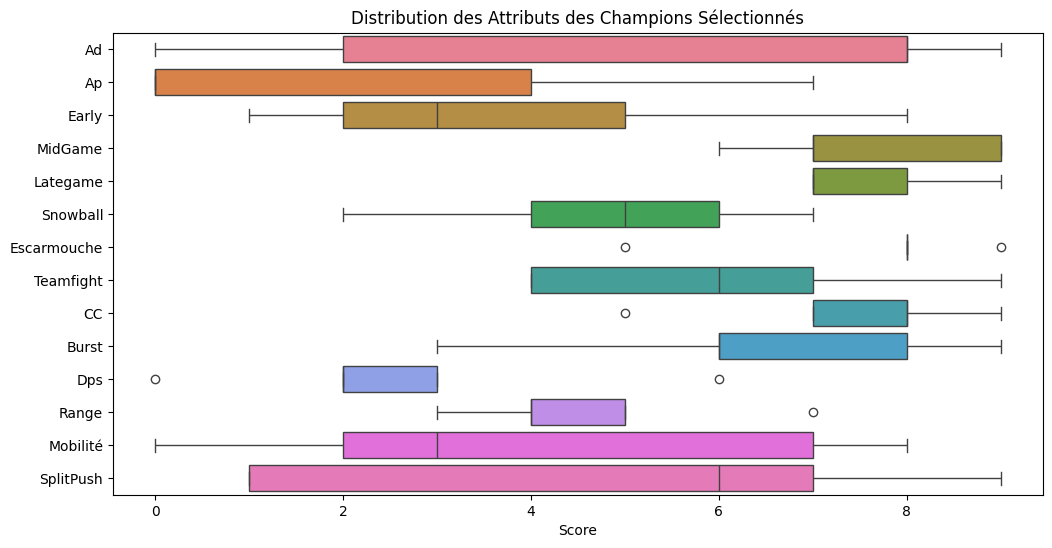

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected_champions[attributes], orient='h')
plt.title('Distribution des Attributs des Champions Sélectionnés')
plt.xlabel('Score')
plt.show()


In [1]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=selected_champions[attributes], orient='h')
plt.title('Distribution et Densité des Attributs des Champions Sélectionnés')
plt.xlabel('Score')
plt.show()


NameError: name 'plt' is not defined

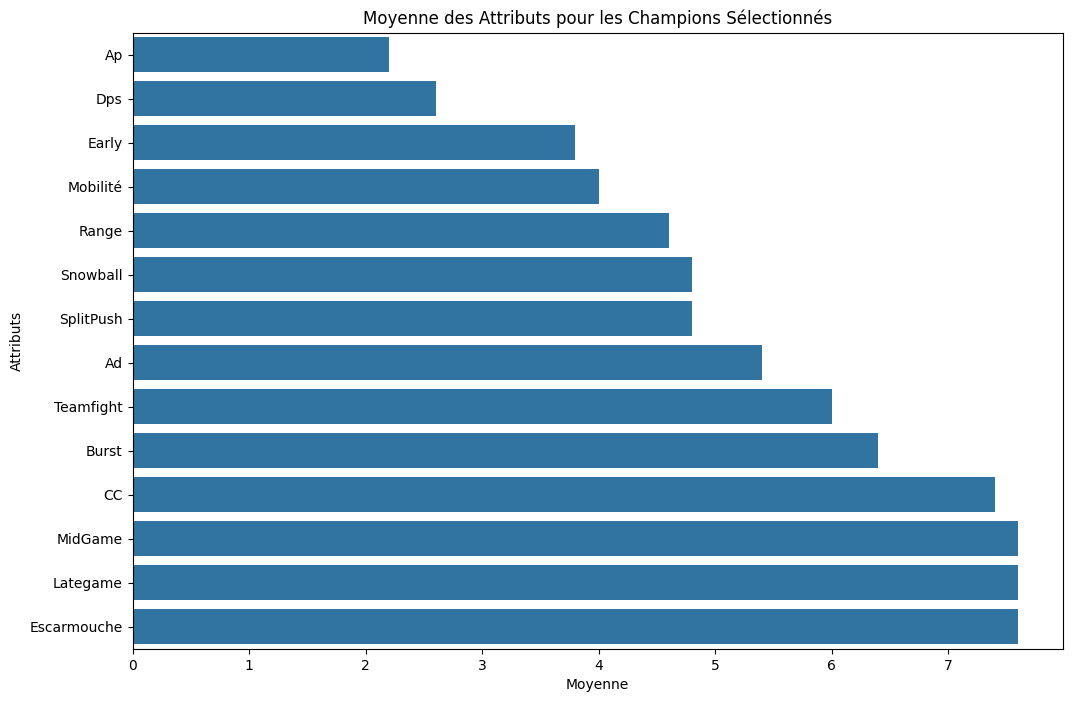

In [47]:
plt.figure(figsize=(12, 8))
mean_attributes = selected_champions[attributes].mean().sort_values()
sns.barplot(x=mean_attributes.values, y=mean_attributes.index)
plt.title('Moyenne des Attributs pour les Champions Sélectionnés')
plt.xlabel('Moyenne')
plt.ylabel('Attributs')
plt.show()


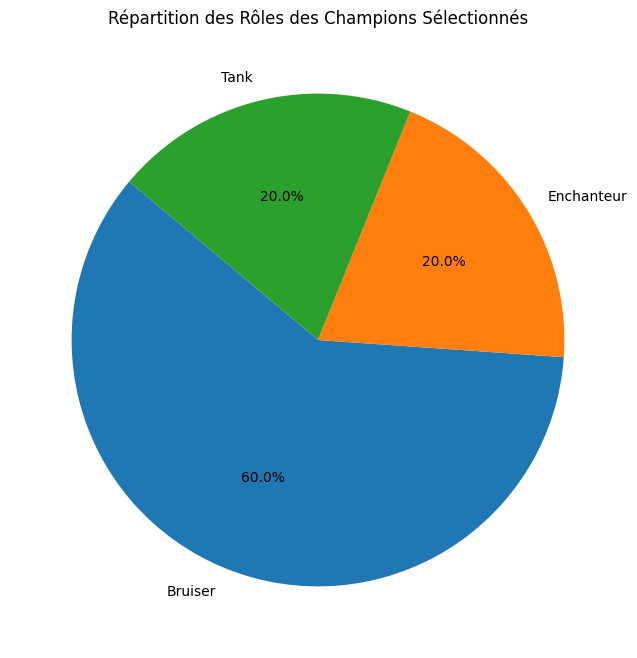

In [48]:
plt.figure(figsize=(8, 8))
role_counts = selected_champions['Rôle principal'].value_counts()
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Rôles des Champions Sélectionnés')
plt.show()



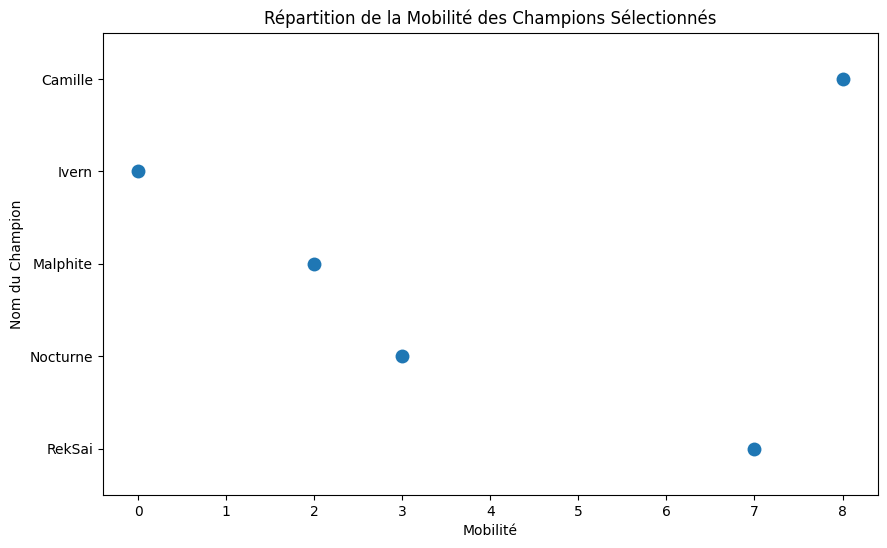

In [49]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=selected_champions, x='Mobilité', y='Nom du Champion', jitter=True, size=10)
plt.title('Répartition de la Mobilité des Champions Sélectionnés')
plt.xlabel('Mobilité')
plt.show()


C:\Users\yifor\AppData\Local\Temp\ipykernel_22388\1052501341.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=selected_champions, x='Dps', shade=True, label='DPS')
C:\Users\yifor\AppData\Local\Temp\ipykernel_22388\1052501341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=selected_champions, x='Burst', shade=True, label='Burst')


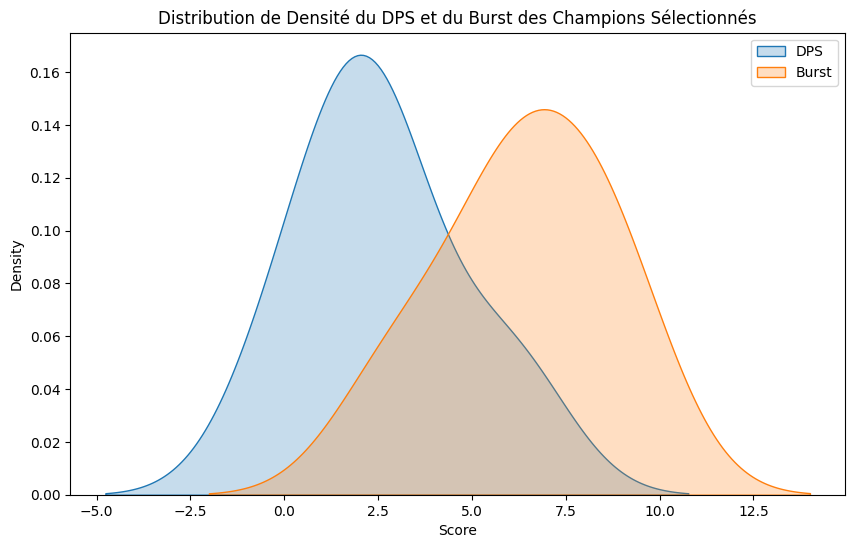

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=selected_champions, x='Dps', shade=True, label='DPS')
sns.kdeplot(data=selected_champions, x='Burst', shade=True, label='Burst')
plt.title('Distribution de Densité du DPS et du Burst des Champions Sélectionnés')
plt.xlabel('Score')
plt.legend()
plt.show()

In [52]:
# Statistiques fournies par l'utilisateur
user_stats = {
    "Ad": 5.4,
    "Ap": 2.2,
    "Early": 3.8,
    "MidGame": 7.6,
    "Lategame": 7.6,
    "Snowball": 4.8,
    "Escarmouche": 7.6,
    "Teamfight": 6.0,
    "CC": 7.4,
    "Burst": 6.4,
    "Dps": 2.6,
    "Range": 4.6,
    "Mobilité": 4.0,
    "SplitPush": 4.8
}

# Remplacer les valeurs NaN par des valeurs par défaut (0 dans ce cas)
champions_data_cleaned = data_champions.fillna(0)

# Sélectionner les colonnes pertinentes pour la comparaison
stats_columns = list(user_stats.keys())
champions_stats_cleaned = champions_data_cleaned[stats_columns]

# Calculer la distance euclidienne entre chaque champion et les statistiques de l'utilisateur
distances_cleaned = champions_stats_cleaned.apply(lambda row: distance.euclidean(row, list(user_stats.values())), axis=1)

# Ajouter les distances nettoyées au DataFrame et trier les champions en fonction de leur proximité
champions_data_cleaned['Distance'] = distances_cleaned
closest_champions_cleaned = champions_data_cleaned.sort_values(by='Distance')

# Afficher les champions les plus proches
closest_champions = closest_champions_cleaned[['Nom du Champion', 'Distance']].head(20)
print(closest_champions)


    Nom du Champion  Distance
126       TahmKench  6.053098
95            Poppy  6.327717
144              Vi  6.483826
138           Urgot  6.560488
17            Briar  6.726069
89         Nocturne  6.858571
39           Graves  7.144228
101          RekSai  7.445804
21          Chogath  7.525955
115            Shen  7.863841
16            Braum  7.901899
75         Malphite  7.914544
7             Annie  8.114185
0            Aatrox  8.175573
19          Camille  8.212186
149         Warwick  8.248636
64             Kled  8.272847
110         Sejuani  8.392854
97           Qiyana  8.627862
52           Ksante  8.662563
